In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [223]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



In [224]:
df= pd.read_csv('customer .csv', sep= ',' , encoding= ' utf-8')

In [225]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NaN,Yes,No,NaN,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NaN,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NaN,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NaN,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NaN,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [226]:
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen        43
Partner               0
Dependents            0
tenure              147
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7000 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6896 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [228]:
fill = {'SeniorCitizen':1 , 'tenure':df['tenure'].mean()}
fill

{'SeniorCitizen': 1, 'tenure': 33.04147331786543}

In [229]:
df['SeniorCitizen'].value_counts()

0.0    5858
1.0    1142
Name: SeniorCitizen, dtype: int64

In [230]:
 df.fillna(fill , inplace=True)
 

In [231]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [232]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure','StreamingMovies','MonthlyCharges',
           'TotalCharges', 'Churn']

In [233]:
df = df[columns]
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,StreamingMovies,MonthlyCharges,TotalCharges,Churn
0,Female,1.0,Yes,No,33.041473,No,29.85,29.85,No
1,Male,1.0,No,No,34.000000,No,56.95,1889.50,No
2,Male,1.0,No,No,2.000000,No,53.85,108.15,Yes
3,Male,1.0,No,No,45.000000,No,42.30,1840.75,No
4,Female,1.0,No,No,2.000000,No,70.70,151.65,Yes


In [234]:
from sklearn.preprocessing import LabelEncoder


In [235]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [236]:
gender_le = LabelEncoder()
churn_le = LabelEncoder()
Streaming_le = LabelEncoder ()


In [237]:
df['Dependents'] = churn_le.fit_transform(df['Dependents'])

In [238]:
df['Partner'] = churn_le.fit_transform(df['Partner'])

In [239]:
df['gender'] = gender_le.fit_transform(df['gender'])

In [240]:
df['Churn'] = churn_le.fit_transform(df['Churn'])


In [241]:
df['StreamingMovies'] = Streaming_le.fit_transform (df['StreamingMovies'])

In [242]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,StreamingMovies,MonthlyCharges,TotalCharges,Churn
0,0,1.0,1,0,33.041473,0,29.85,29.85,0
1,1,1.0,0,0,34.000000,0,56.95,1889.50,0
2,1,1.0,0,0,2.000000,0,53.85,108.15,1
3,1,1.0,0,0,45.000000,0,42.30,1840.75,0
4,0,1.0,0,0,2.000000,0,70.70,151.65,1


In [243]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,StreamingMovies,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001622,-0.001808,0.010517,0.010031,-0.008743,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001622,1.000000,0.014132,-0.206323,0.013337,0.042850,0.217894,0.101257,0.150035
Partner,-0.001808,0.014132,1.000000,0.452676,0.370704,0.129574,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.206323,0.452676,1.000000,0.158957,0.021321,-0.113890,0.064535,-0.164221
tenure,0.010031,0.013337,0.370704,0.158957,1.000000,0.289200,0.236084,0.814245,-0.341083
StreamingMovies,-0.008743,0.042850,0.129574,0.021321,0.289200,1.000000,0.335459,0.397909,-0.038492
MonthlyCharges,-0.014569,0.217894,0.096848,-0.113890,0.236084,0.335459,1.000000,0.650468,0.193356
TotalCharges,0.000048,0.101257,0.318812,0.064535,0.814245,0.397909,0.650468,1.000000,-0.199428
Churn,-0.008612,0.150035,-0.150448,-0.164221,-0.341083,-0.038492,0.193356,-0.199428,1.000000


In [244]:
ten_min = df['tenure'].min()
ten_max = df['tenure'].max()
df['tenure'] = (df['tenure']-ten_min)/(ten_max-ten_min)

In [245]:
tot_min = df['TotalCharges'].min()
tot_max = df['TotalCharges'].max()
df['TotalCharges'] = (df['TotalCharges']-tot_min)/(tot_max-ten_min)

In [246]:
mn_min = df['MonthlyCharges'].min()
mn_max = df['MonthlyCharges'].max()
df['MonthlyCharges'] = (df['MonthlyCharges']-mn_min)/(mn_max-ten_min)

In [247]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,StreamingMovies,MonthlyCharges,TotalCharges,Churn
0,0,1.0,1,0,0.451288,0,0.098514,0.001272,0
1,1,1.0,0,0,0.464789,0,0.328662,0.215424,0
2,1,1.0,0,0,0.014085,0,0.302335,0.010289,1
3,1,1.0,0,0,0.619718,0,0.204246,0.209810,0
4,0,1.0,0,0,0.014085,0,0.445435,0.015299,1


In [248]:
from sklearn.model_selection import train_test_split

In [249]:
X = df.drop('Churn' , axis= 1).values 
Y = df['Churn'].values

In [250]:
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size= 0.20, random_state =30)

In [251]:
x_train.shape

(5634, 8)

In [252]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier ( max_depth=7, max_features=6)

In [253]:
dt=DecisionTreeClassifier ( max_depth=7, max_features=6)

In [254]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, max_features=6)

In [255]:
dt.score(x_train,y_train)

0.8219737309194178

In [256]:
dt.score(x_test,y_test)

0.7735982966643009

In [259]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for dt')
    plt.show()

# whatever your features are called
features_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                  'tenure','StreamingMovies','MonthlyCharges','TotalCharges']
    
dt= DecisionTreeClassifier (max_depth=7, max_features=6)
dt.fit(x_train,y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(df.feature_importances_), features_names, top=7)


AttributeError: 'DataFrame' object has no attribute 'feature_importances_'

In [260]:
from sklearn.ensemble import RandomForestClassifier

In [261]:
rf = RandomForestClassifier(max_depth=5, max_features=6)

In [262]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features=6)

In [263]:
rf.score(x_train,y_train)

0.8061767838125665

In [264]:
rf.score(x_test,y_test)

0.7693399574166075

In [117]:
z=rf.predict(x_test)
z

array([0, 0, 0, ..., 0, 0, 1])

In [118]:
y_test.shape

(1409,)

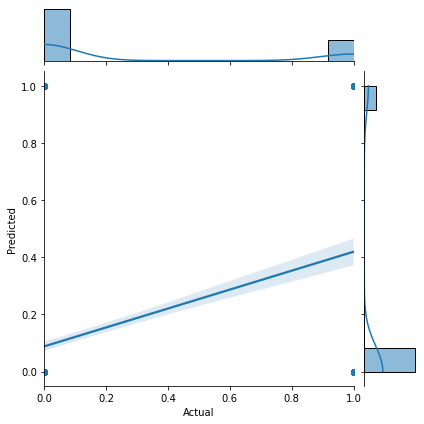

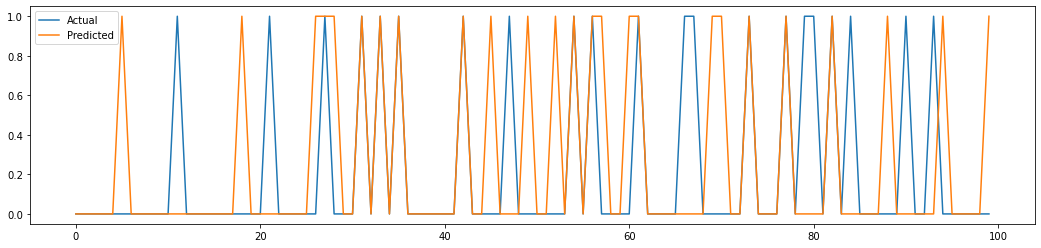

In [119]:
z=rf.predict(x_test)

test = pd.DataFrame({'Predicted':z,'Actual':y_test})
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)
fig= plt.figure(figsize=(18,4))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])


In [120]:
#pip install xgboost

In [121]:
#pip install --upgrade xgboost

In [177]:
from xgboost import XGBClassifier

In [269]:
xgb = XGBClassifier(objective= 'binary:logistic', learning_rate=0.3, max_depth=3)

In [270]:
xgb.fit(x_train,y_train)

C:\Users\Sniper\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:49:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [271]:
xgb.score(x_train,y_train)

0.827831025914093

In [272]:
xgb.score(x_test,y_test)

0.7757274662881476

In [181]:
xgb.score(x_train,y_train)

0.8951011714589989

In [182]:
xgb.score(x_test,y_test)

0.7572746628814763

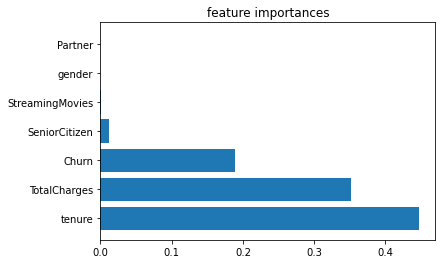

In [128]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'StreamingMovies', 'TotalCharges', 'Churn']
    
rf =RandomForestClassifier(n_estimators=4 , max_depth=3 , min_samples_split=25 , max_features=4)
rf.fit(x_train,y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(rf.feature_importances_), features_names, top=7)


In [129]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [130]:
#pip install --upgrade xgboost

In [183]:
from xgboost import XGBClassifier


In [184]:
xgb= XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42,
                   max_depth=6, learning_rate=0.3)
                              
xgb.fit(x_train, y_train)

C:\Users\Sniper\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=2, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [185]:
xgb.score(x_train,y_train)

0.8370607028753994

In [186]:
xgb.score(x_test,y_test)

0.7665010645848119

In [187]:
#Prediction
y_pred = xgb.predict_proba(x_test)

C:\Users\Sniper\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


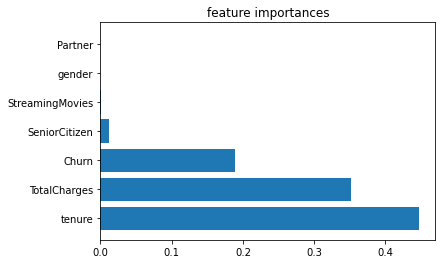

In [136]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'StreamingMovies', 'TotalCharges', 'Churn']
    
xgb =XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42)
xgb.fit(x_train,y_train)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(rf.feature_importances_), features_names, top=7)


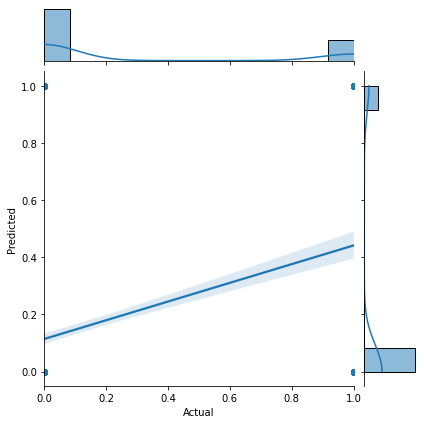

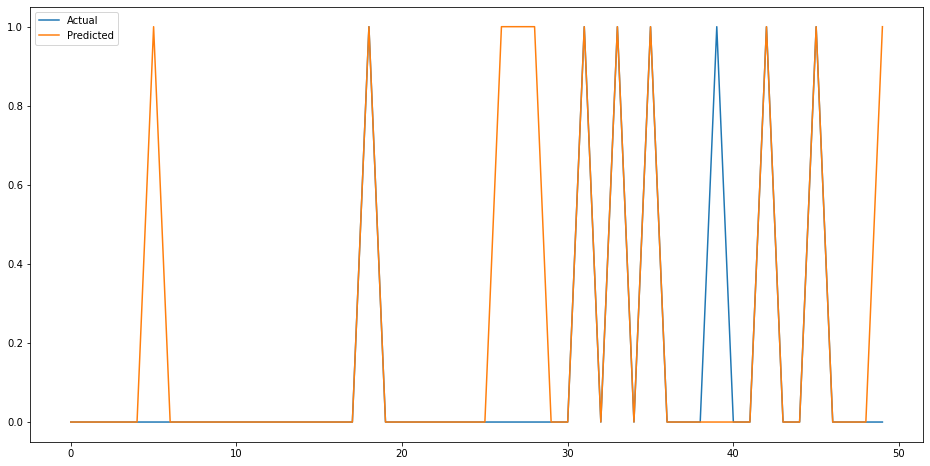

In [137]:
test = pd.DataFrame({'Predicted':z,'Actual':y_test})
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])


In [138]:
new_user = [0,0.0,0,0,33.0,0,29.85,151.65]

In [139]:
df.predict([new_user])

AttributeError: 'DataFrame' object has no attribute 'predict'

In [72]:
df.predict_proba([new_user])

array([[0., 1.]])

In [76]:
df

DecisionTreeClassifier(max_depth=7, max_features=6)

In [73]:
#new_user = ['Male',22,"Yes","No",2000,"No"]


In [74]:
new_user[0] = gender_le.transform([new_user[0]])[0]
new_user[2] = churn_le.transform([new_user[2]])[0]
new_user[3] = churn_le.transform([new_user[3]])[0]
new_user[5] = streaming_le.transform([new_user[5]])[0]

C:\Users\Sniper\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [75]:
new_user

[0, 0.0, 0, 0, 33.0, 0, 29.85, 151.65]

In [ ]:
new_user[1] = (new_user[1] - ten_min)/(ten_max-ten_min)
new_user[4] = (new_user[4] - tot_min)/(tot_max-tot_min)

In [ ]:
dt.predict_proba([new_user])

In [ ]:
dt.predict([new_user])

In [142]:
pip install ada-boost

Note: you may need to restart the kernel to use updated packages.


In [188]:
from sklearn.ensemble import AdaBoostClassifier

In [282]:
abc = AdaBoostClassifier(n_estimators=7, learning_rate=0.6)


In [283]:
abc.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.6, n_estimators=7)

In [284]:
abc.score(x_train,y_train)

0.7740504082357117

In [285]:
abc.score(x_test,y_test)

0.7409510290986515

In [195]:
pip install voting

Note: you may need to restart the kernel to use updated packages.


In [286]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [287]:
LR = LogisticRegression(multi_class='multinomial', random_state=1)
RF = RandomForestClassifier(n_estimators=50, random_state=1)


In [293]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier ( max_depth=4, max_features=6)

In [294]:
VC = VotingClassifier(estimators=[('RF',RF),('dt',dt)],voting='hard')             # voting = 'hard'.


In [295]:
VC.fit(x_train, y_train)


VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=4,
                                                     max_features=6))])

In [296]:
VC.score(x_train,y_train)

0.843095491657792

In [297]:
VC.score(x_test,y_test)

0.7579843860894251